<a href="https://www.kaggle.com/buzzini/eda-predictions-tabular-playground-jan-2022?scriptVersionId=86980713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv


In [2]:
# importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.options.display.float_format = '{:,}'.format

**Importing Datasets:**

In [3]:
train = pd.read_csv(r'../input/tabular-playground-series-jan-2022/train.csv')
test = pd.read_csv(r'../input/tabular-playground-series-jan-2022/test.csv')

In [4]:
#holidays = pd.read_csv(r'../input/gdp-of-finland-norway-and-sweden-2015-2019/GDP_data_2015_to_2019_Finland_Norway_Sweden.csv', parse_dates=['date'])
#holidays.head()

## EDA

**First overview of the datasets:**

In [5]:
print(f'train shape: {train.shape}', f'test shape: {test.shape}', f'train rows / (train + test rows): {train.shape[0]/(train.shape[0]+test.shape[0])}', sep='\n')

train shape: (26298, 6)
test shape: (6570, 5)
train rows / (train + test rows): 0.8001095290251917


Which columns compose the datasets?

In [6]:
print(f'train columns: {train.columns}', f'test columns: {test.columns}', sep='\n')

train columns: Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')
test columns: Index(['row_id', 'date', 'country', 'store', 'product'], dtype='object')


As we can see, we have to predict the sales occured in each store in order to predict are best ones going forward.

In [7]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [8]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

How many missing values are there in training and test sets?

In [9]:
train.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [10]:
test.isna().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

There are no NA's, great news.

- How many / Which countries contains a Kaggle store? 
- How many Kaggle stores are there in the dataset? H
- How many / Which products are there? 
- Which countries/stores sell more?

In [11]:
train['country'].unique()

array(['Finland', 'Norway', 'Sweden'], dtype=object)

Kaggle stores are situated only in northern Europe.

In [12]:
train['store'].unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

There are two different stores.

In [13]:
train['product'].unique()

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

As We can expected, it seems that stores contain only nerd products :)

In [14]:
country_sold = train.groupby('country')['num_sold'].sum().sort_values(ascending=False)
country_sold.map('{:,}'.format)

country
Norway     4,404,706
Sweden     3,105,725
Finland    2,680,927
Name: num_sold, dtype: object

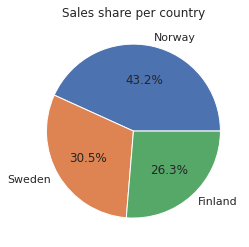

In [15]:
plt.pie(country_sold.values, labels=country_sold.index, autopct='%0.1f%%')
plt.title('Sales share per country')
plt.show()

In [16]:
products_mean = train.groupby(['country', 'store', 'product']).agg(
    {'product': 'count', 'num_sold': 'mean'})
products_mean['product'].map('{:,}'.format)
products_mean['num_sold'].map('{:,}'.format)
products_mean

product            num_sold
country store      product                                    
Finland KaggleMart Kaggle Hat         1461   362.4798083504449
                   Kaggle Mug         1461  204.20054757015743
                   Kaggle Sticker     1461   103.0444900752909
        KaggleRama Kaggle Hat         1461   628.9267624914443
                   Kaggle Mug         1461  356.11088295687887
                   Kaggle Sticker     1461  180.23203285420945
Norway  KaggleMart Kaggle Hat         1461   594.6454483230664
                   Kaggle Mug         1461   334.3702943189596
                   Kaggle Sticker     1461  169.57768651608487
        KaggleRama Kaggle Hat         1461 1,036.3579739904176
                   Kaggle Mug         1461   584.2977412731007
                   Kaggle Sticker     1461   295.6078028747433
Sweden  KaggleMart Kaggle Hat         1461  419.21423682409306
                   Kaggle Mug         1461  235.88501026694044
                   Kaggle Sticker     1461   119.6132785763176
        KaggleRama Kaggle Hat         1461   731.4524298425736
                   Kaggle Mug         1461  411.27310061601645
                   Kaggle Sticker     1461   208.3148528405202

- Countries, stores and products sold are equally distributed in train set, but some places sell more in quantity. I would say that every product and every store are registered for every day between 2015 and 2018
- Norway through the years sold more than 4 millions of pieces, for about 43% of all sales
- Finland in the country with the worst results
- It seems that the Kaggle Hat is the best product everywhere, followed by the Kaggle Mug.

Let's see which store sells more between KaggleRama and KaggleMart in each country: 


In [17]:
store_sold_average = train.groupby(['country', 'store']).agg(
    {'num_sold': 'mean'})
store_sold_average

num_sold
country store                        
Finland KaggleMart  223.2416153319644
        KaggleRama 388.42322610084415
Norway  KaggleMart  366.1978097193703
        KaggleRama  638.7545060460872
Sweden  KaggleMart 258.23750855578373
        KaggleRama 450.34679443303673

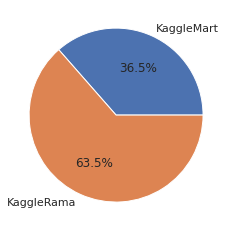

In [18]:
store_sold_total = train.groupby(['store'])['num_sold'].sum()
plt.pie(store_sold_total.values, labels=store_sold_total.index, autopct='%0.1f%%')
plt.show()

- KaggleRama seems to bee the best store, on average and on total sales, counting for the 63.5% of total amount

Let's see the sales distribution for each country and store.

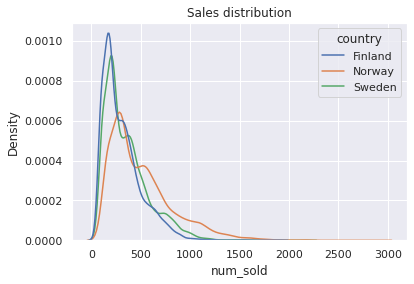

In [19]:
sns.kdeplot(x=train['num_sold'], hue=train['country'])
plt.title('Sales distribution')
plt.show()

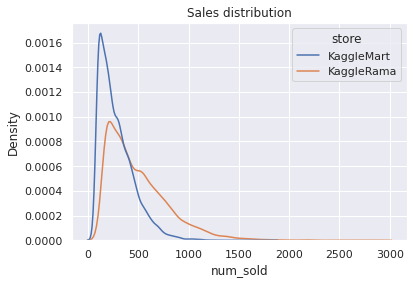

In [20]:
sns.kdeplot(x=train['num_sold'], hue=train['store'])
plt.title('Sales distribution')
plt.show()

- Sales distribution is right skewed in all countries and stores

The df is a timeseries, so I'll transform date column into the index and we can then add year, month and weekday name columns:

In [21]:
train.set_index(train['date'], inplace=True)
test.set_index(test['date'], inplace=True)
train.head()

,row_id,date,country,store,product,num_sold
date,,,,,,
2015-01-01,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
2015-01-01,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2015-01-01,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
2015-01-01,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
2015-01-01,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [22]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Weekday'] = train.index.day_name()
train.head()

,row_id,date,country,store,product,num_sold,Year,Month,Weekday
date,,,,,,,,,
2015-01-01,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,Thursday
2015-01-01,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,Thursday
2015-01-01,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,Thursday
2015-01-01,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,Thursday
2015-01-01,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,Thursday


Let's visualize something possible time patterns:

<AxesSubplot:xlabel='date'>

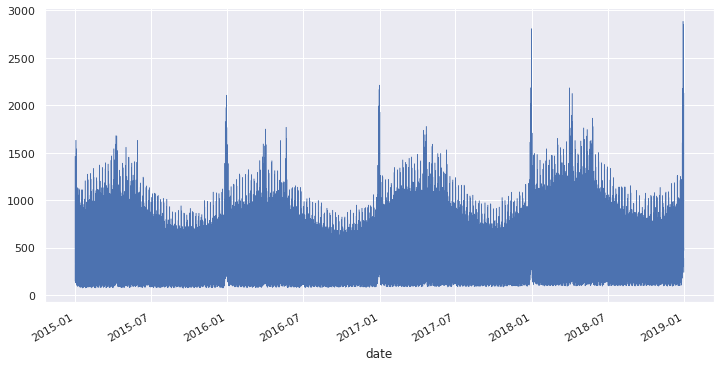

In [23]:
plt.figure(figsize=[12, 6])
train['num_sold'].plot(linewidth=0.5)

Sales are too variables, but we can instantly see some patterns:
- there is always a peak in sales around December/January then they go immediately down
- after sales increase until May/June/July and they go down until October/November
- the cycle is repeated

We can say that there are regular seasonality and cyclical trends.

Let's see if the trend is the same for each country and store:

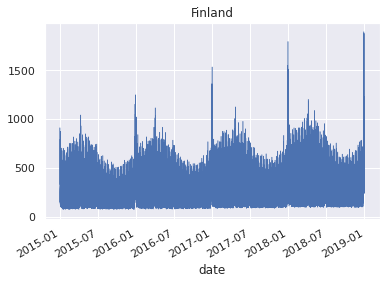

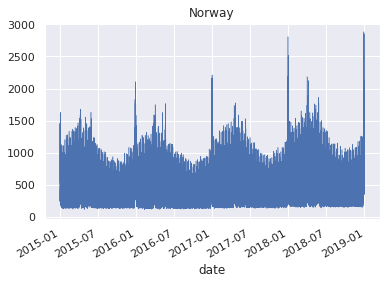

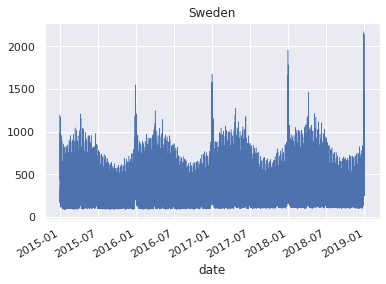

In [24]:
for country in train['country'].unique():
    temp_df = train.copy()
    temp_df.loc[temp_df['country'] == country, 'num_sold'].plot(linewidth=0.5)
    plt.title(country)
    plt.show()

- The trend is exactly the same for each country, and what about the stores?


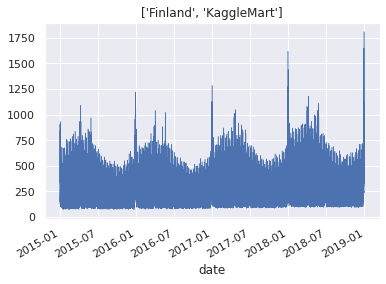

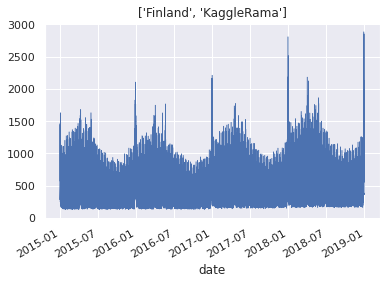

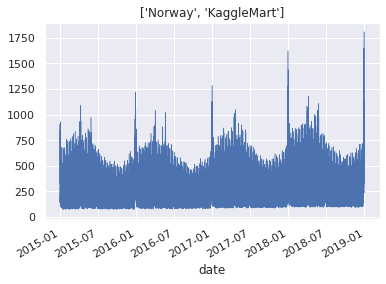

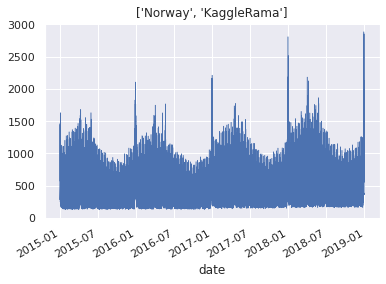

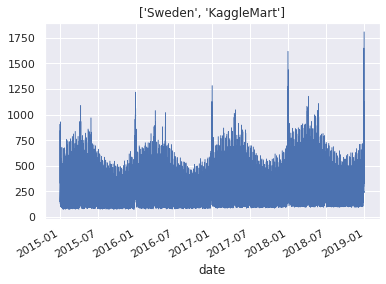

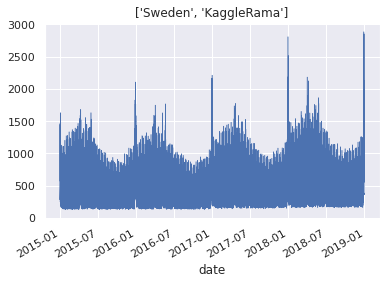

In [25]:
for country in train['country'].unique():
    temp_df = train.copy()
    for store in temp_df['store'].unique():
        temp_df.loc[temp_df['store'] == store, 'num_sold'].plot(linewidth=0.5)
        plt.title([country, store])
        plt.show()

The same for the stores.

Let's see if kaggle sales are going up through the years as it seems and which are the best months and days of the week to sell:

In [26]:
train['num_sold'].resample('Y').sum().map('{:,}'.format)

date
2015-12-31    2,393,991
2016-12-31    2,403,352
2017-12-31    2,601,797
2018-12-31    2,792,218
Freq: A-DEC, Name: num_sold, dtype: object

Kaggle sales are going up through last years.

In [27]:
year_sales = train['num_sold'].resample('Y').sum()
year_sales.pct_change()

date
2015-12-31                    NaN
2016-12-31   0.003910206847060005
2017-12-31     0.0825700937690359
2018-12-31    0.07318826180520621
Freq: A-DEC, Name: num_sold, dtype: float64

Sales increased for about 7% from 2017 to 2018!

In [28]:
year_month_group = train.groupby(['Year', 'Month']).agg(
    {'num_sold': 'sum'}).sort_values(by=['Year', 'num_sold'], ascending=False)
year_month_group['num_sold'] = year_month_group['num_sold'].map('{:,}'.format)
year_month_group

num_sold
Year Month         
2018 12     278,313
     4      263,972
     1      263,362
     5      262,620
     3      255,754
     2      226,784
     6      226,746
     7      209,697
     11     207,587
     10     202,089
     8      201,304
     9      193,990
2017 12     269,168
     4      245,990
     1      240,451
     3      232,159
     5      231,560
     6      213,999
     2      209,442
     11     201,159
     7      199,509
     10     189,968
     8      187,567
     9      180,825
2016 12     239,338
     1      233,064
     3      225,649
     5      222,293
     4      216,999
     2      200,888
     6      189,879
     7      182,102
     11     181,780
     10     177,274
     8      170,626
     9      163,460
2015 12     234,168
     5      226,956
     1      226,857
     4      224,578
     3      220,316
     2      195,569
     6      192,918
     11     180,938
     7      180,627
     10     174,342
     8      172,740
     9      163,982

In [29]:
month_group = train.groupby(['Month']).agg(
    {'num_sold': 'sum'}).sort_values(by=['num_sold'], ascending=False)
month_group['num_sold'] = month_group['num_sold'].map('{:,}'.format)
month_group

,num_sold
Month,
12,"1,020,987"
1,"963,734"
4,"951,539"
5,"943,429"
3,"933,878"
2,"832,683"
6,"823,542"
7,"771,935"
11,"771,464"


- December is the month with most sales, probably for Christmas
- The The first part of the year from January to May is a good time for kaggle pockets

In [30]:
weekday_sales = train.groupby(['Year', 'Weekday']).agg(
    {'num_sold': 'sum'}).sort_values(by=['Year', 'num_sold'], ascending=False)
weekday_sales['num_sold'] = weekday_sales['num_sold'].map('{:,}'.format)
weekday_sales

num_sold
Year Weekday           
2018 Saturday   464,278
     Sunday     462,596
     Friday     388,469
     Monday     380,492
     Thursday   366,710
     Tuesday    365,336
     Wednesday  364,337
2017 Sunday     442,358
     Saturday   432,473
     Friday     363,389
     Thursday   345,739
     Wednesday  341,359
     Tuesday    338,786
     Monday     337,693
2016 Saturday   405,897
     Sunday     389,122
     Friday     347,169
     Thursday   318,800
     Wednesday  316,290
     Tuesday    314,145
     Monday     311,929
2015 Sunday     393,825
     Saturday   391,373
     Friday     328,283
     Thursday   327,401
     Wednesday  318,907
     Tuesday    317,964
     Monday     316,238

- Most of sales are concentrated in the weekend.


Let's see the variability in each year and month.

Text(0.5, 1.0, 'Sales by Year')

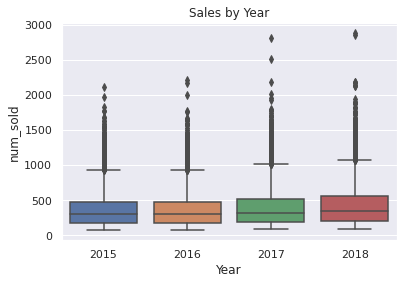

In [31]:
sns.boxplot(data=train, x='Year', y='num_sold')
plt.ylabel('num_sold')
plt.title('Sales by Year')

- Variability through each year is pretty much the same.

- There are many outliers. We'll to take care of that in training model section

Text(0.5, 1.0, 'Sales by Year')

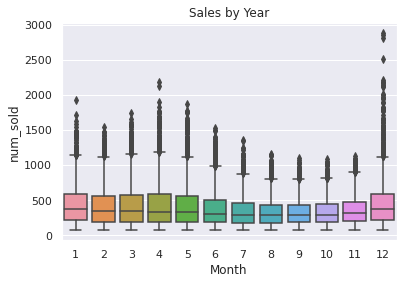

In [32]:
sns.boxplot(data=train, x='Month', y='num_sold')
plt.ylabel('num_sold')
plt.title('Sales by Year')

Last plots didn't tell much more then what we saw earlier.

Let's explore Sales average per month trend

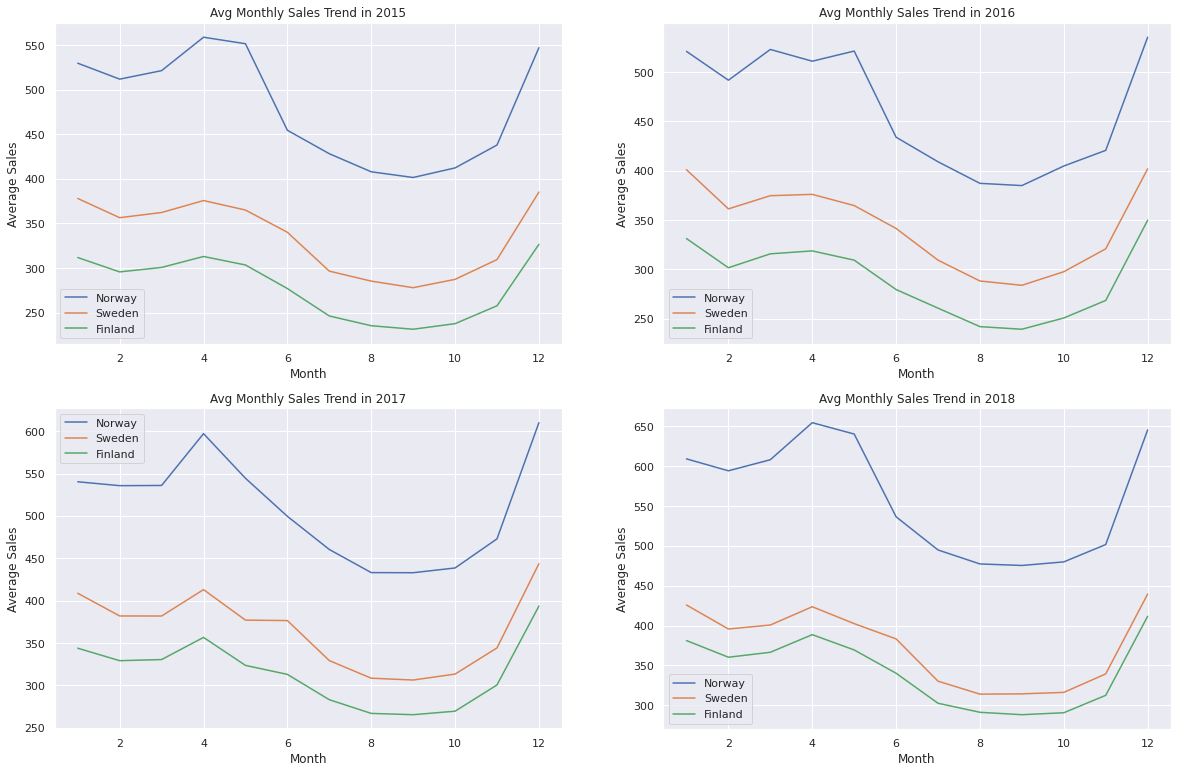

In [33]:
df = train.groupby(['country','Year','Month']).num_sold.mean().reset_index()
fig = plt.figure(figsize  = (20,13)) 
year = 2015
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(df[(df['Year']==year) & (df['country']=='Norway')]['Month'], df[(df['Year']==year) & (df['country']=='Norway')]['num_sold'], label = 'Norway')
    ax.plot(df[(df['Year']==year) & (df['country']=='Sweden')]['Month'], df[(df['Year']==year) & (df['country']=='Sweden')]['num_sold'], label = 'Sweden')
    ax.plot(df[(df['Year']==year) & (df['country']=='Finland')]['Month'], df[(df['Year']==year) & (df['country']=='Finland')]['num_sold'], label = 'Finland')
    ax.title.set_text(f'Avg Monthly Sales Trend in {year}')
    ax.set_ylabel('Average Sales')
    ax.set_xlabel('Month')
    ax.legend()
    year+=1

- Trends are pretty much the same, lines are almost the same line translated, especially for Sweden and Finland

What about the stores?

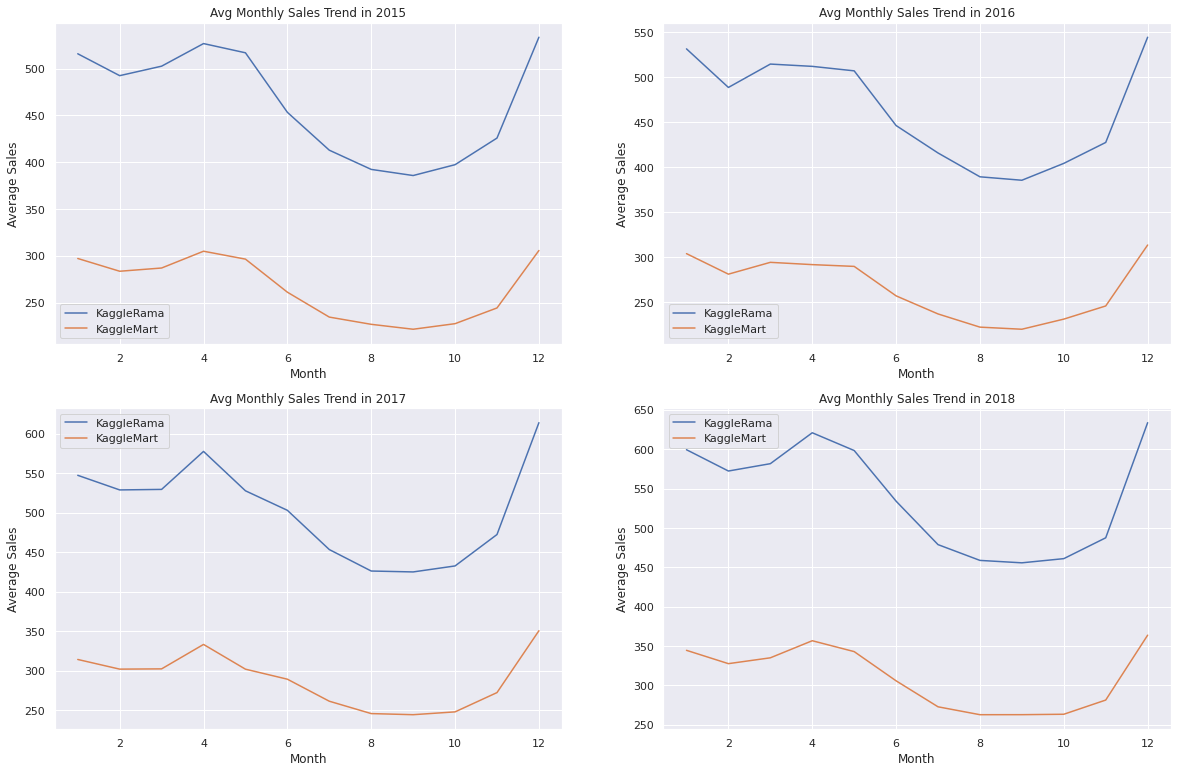

In [34]:
df = train.groupby(['store','Year','Month']).num_sold.mean().reset_index()
fig = plt.figure(figsize  = (20,13)) 
year = 2015
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(df[(df['Year']==year) & (df['store']=='KaggleRama')]['Month'], df[(df['Year']==year) & (df['store']=='KaggleRama')]['num_sold'], label = 'KaggleRama')
    ax.plot(df[(df['Year']==year) & (df['store']=='KaggleMart')]['Month'], df[(df['Year']==year) & (df['store']=='KaggleMart')]['num_sold'], label = 'KaggleMart')
    ax.title.set_text(f'Avg Monthly Sales Trend in {year}')
    ax.set_ylabel('Average Sales')
    ax.set_xlabel('Month')
    ax.legend()
    year+=1

- Same insights from the stores

And what about the products?

In [35]:
train['product'].unique()

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

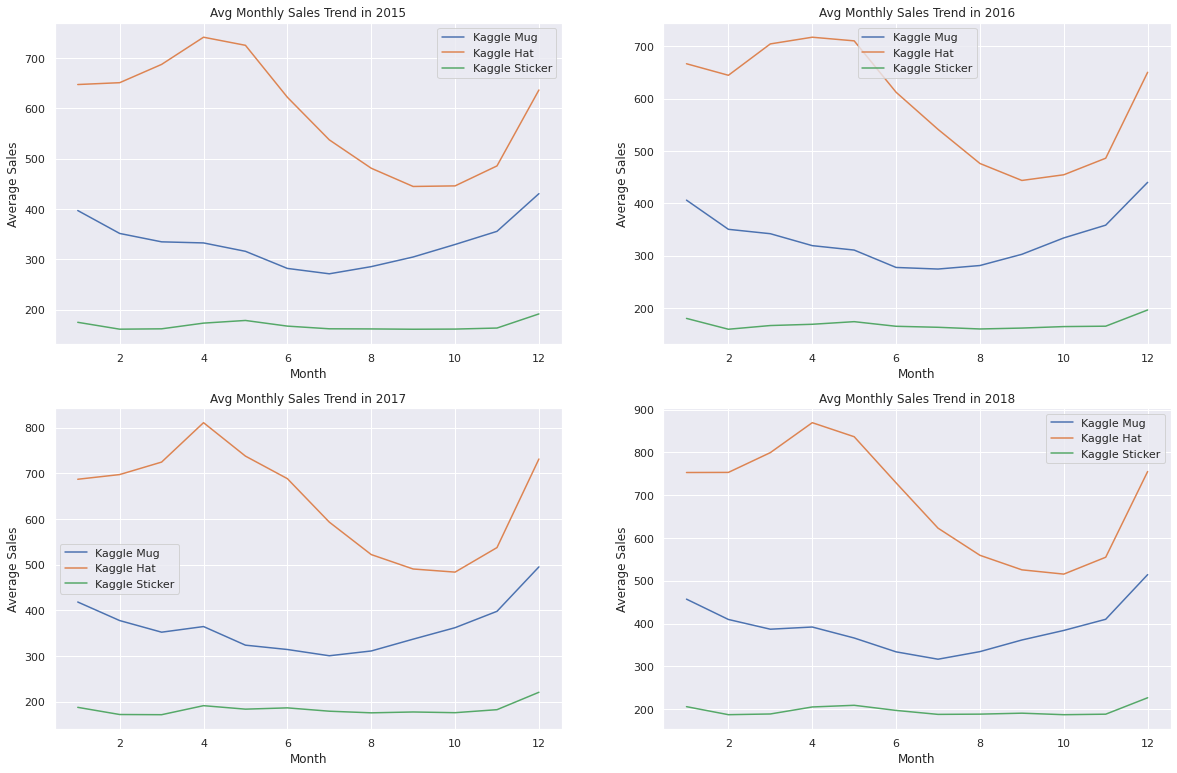

In [36]:
df = train.groupby(['product','Year','Month']).num_sold.mean().reset_index()
fig = plt.figure(figsize  = (20,13)) 
year = 2015
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(df[(df['Year']==year) & (df['product']=='Kaggle Mug')]['Month'], df[(df['Year']==year) & (df['product']=='Kaggle Mug')]['num_sold'], label = 'Kaggle Mug')
    ax.plot(df[(df['Year']==year) & (df['product']=='Kaggle Hat')]['Month'], df[(df['Year']==year) & (df['product']=='Kaggle Hat')]['num_sold'], label = 'Kaggle Hat')
    ax.plot(df[(df['Year']==year) & (df['product']=='Kaggle Sticker')]['Month'], df[(df['Year']==year) & (df['product']=='Kaggle Sticker')]['num_sold'], label = 'Kaggle Sticker')
    ax.title.set_text(f'Avg Monthly Sales Trend in {year}')
    ax.set_ylabel('Average Sales')
    ax.set_xlabel('Month')
    ax.legend()
    year+=1

- Like for the countries and stores, the trend for the products is similar for every year.
- Hats peak in April and December and has minmum sales in September-October.
- Mugs peak in December and the sales dips in July-August.
- Stickers follow almost same sales through out the Year irrespective of country, store etc.

## Model building

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

**1. Preparing data for training**

I'll do a one hot encoding for categorical variables, except for weekdays. For weekdays I will distinguish between days, Fridays and other days of the week I will keep only month and weekday for the time fields, as we saw that the year seems to not influence the sales.

In [38]:
train_encoded = pd.concat([train, pd.get_dummies(train[['country', 'store', 'product']])], axis=1).drop(
    columns=['row_id', 'date', 'country', 'store', 'product', 'country_Finland', 'store_KaggleMart', 'product_Kaggle Sticker'])
weekday_dict = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7,
}
train_encoded['Weekday'] = train_encoded['Weekday'].map(weekday_dict)
train_encoded.head()

,num_sold,Year,Month,Weekday,country_Norway,country_Sweden,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug
date,,,,,,,,,
2015-01-01,329,2015,1,4,0,0,0,0,1
2015-01-01,520,2015,1,4,0,0,0,1,0
2015-01-01,146,2015,1,4,0,0,0,0,0
2015-01-01,572,2015,1,4,0,0,1,0,1
2015-01-01,911,2015,1,4,0,0,1,1,0


`num_sold` column is on another scale in comparison with other variables, but it is the target variable so we don't have to scale it.

Dividing the predictors from the target column:

In [39]:
X = train_encoded.iloc[:, 1:]
y = train_encoded['num_sold']

In [40]:
linear_regression = LinearRegression()
linear_regression_fit = linear_regression.fit(X, y)

In [41]:
y_pred = linear_regression_fit.predict(X)
print(f'Linear regression RMSE: {math.sqrt(mean_squared_error(y, y_pred))}')

Linear regression RMSE: 128.06839806618464


We are very far from having a good result.
In any case, let's see model coefficients:

In [42]:
pd.DataFrame(linear_regression_fit.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Year,21.357299824375364
Month,-5.873247213240276
Weekday,17.207142668466552
country_Norway,196.64373716632437
country_Sweden,48.45973077800584
store_KaggleRama,209.94919765761654
product_Kaggle Hat,449.4477526808121
product_Kaggle Mug,174.957905544148


- Month has a negative coefficient but we say earlier that december is the best month every year. Maybe it's a good idea to classify eache month by past results
- Kaggle Hat has a much higher coefficient than Kaggle Mug, and it's a good sign that they are both positive. In fact Kaggle Sticker is the worst product
- Same insights for countries field coefficients
- Weekday has a positive coefficient and it's correct, in fact we say tha sales go up from Monday to Friday

**I think that a linear model is not a good solution for this problem.**

In [43]:
month_dict = {
    1: 3,
    2: 2,
    3: 3,
    4: 3,
    5: 3,
    6: 2,
    7: 1,
    8: 1,
    9: 1,
    10: 1,
    11: 1,
    12: 3,
}

weekend_dict = {
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 1,
    7: 1}
train_encoded['IsWeekend'] = train_encoded['Weekday'].map(weekend_dict)
train_encoded['month_class'] = train_encoded['Month'].map(month_dict)
train_encoded.head()

,num_sold,Year,Month,Weekday,country_Norway,country_Sweden,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,IsWeekend,month_class
date,,,,,,,,,,,
2015-01-01,329,2015,1,4,0,0,0,0,1,0,3
2015-01-01,520,2015,1,4,0,0,0,1,0,0,3
2015-01-01,146,2015,1,4,0,0,0,0,0,0,3
2015-01-01,572,2015,1,4,0,0,1,0,1,0,3
2015-01-01,911,2015,1,4,0,0,1,1,0,0,3


Train correlations:

<AxesSubplot:>

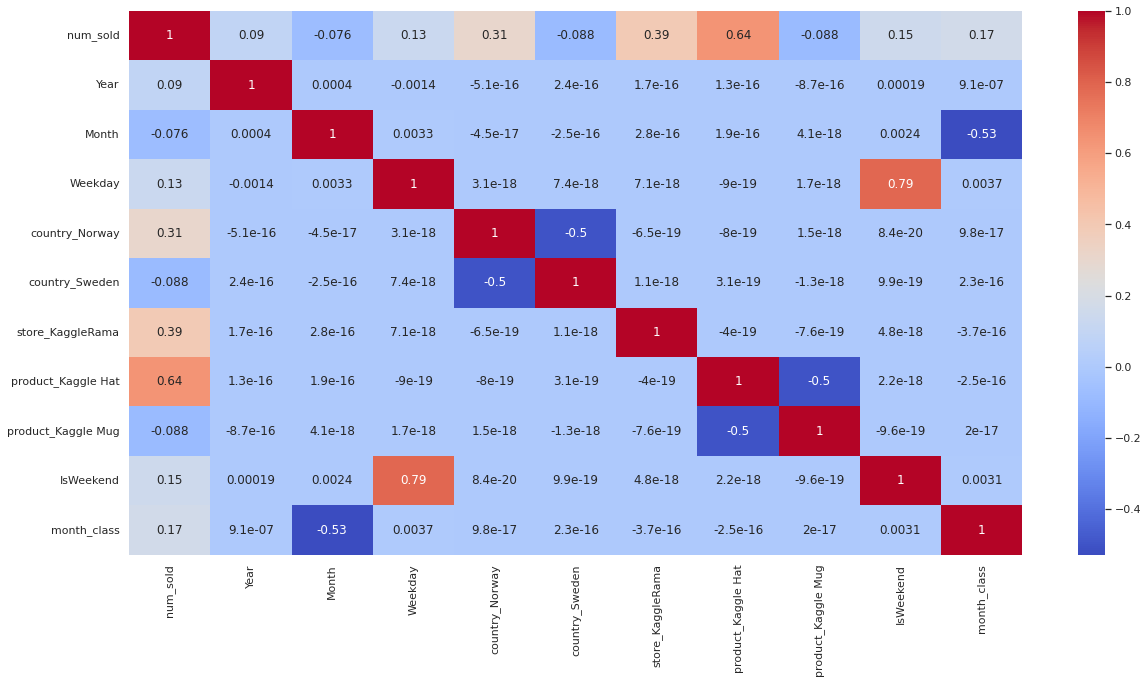

In [44]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(train_encoded.corr(), annot=True, cmap="coolwarm")

**Target column deductions:**
- It seems to be negatively correlated with Month column, but as we saw the best month for sales is december. I think I will only keep month class column in model training
- Other columns interact with `num_sold` columns like we saw in EDA section: the day of the week influence the number of sales, the hat is the most sold product, Norway is the country with more sales and KaggleRama store sells more than KaggleMart

**Interactions between predictors:**
- `Weekday` column is highly correlated with `IsWeekend` column. I can think about excluding one of those.

In [45]:
X2 = train_encoded.iloc[:,1:]
X2.drop(columns=['Month', 'Weekday'], inplace=True)
linear_regression_fit = linear_regression.fit(X2, y)
y_pred2 = linear_regression_fit.predict(X2)
print(f'Linear regression RMSE: {math.sqrt(mean_squared_error(y, y_pred2))}')

Linear regression RMSE: 120.4865093350458


The root mean square error is a little bit lower. It seems that new features worked!

Let's see new coefficients.

In [46]:
pd.DataFrame(linear_regression_fit.coef_, X2.columns, columns=['Coefficients'])

,Coefficients
Year,21.300796802083116
country_Norway,196.64373716632417
country_Sweden,48.4597307780062
store_KaggleRama,209.94919765761648
product_Kaggle Hat,449.4477526808119
product_Kaggle Mug,174.9579055441479
IsWeekend,86.47017411598523
month_class,48.01028693111747


Now let's try some ensembles to boost our predictions, let's begin with a Random Forest

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
     X2, y, test_size=0.25, random_state=123)

In [49]:
random_forest = RandomForestRegressor()
random_forest_fit = random_forest.fit(X_train, y_train)
test_rf_pred = random_forest_fit.predict(X_test)
print(f'Random forest RMSE: {math.sqrt(mean_squared_error(y_test, test_rf_pred))}')

Random forest RMSE: 83.49593808449376


Random Forest works much better, but I think tha the hey to improve more is working on feature engineering.

<AxesSubplot:title={'center':'Feature importance'}>

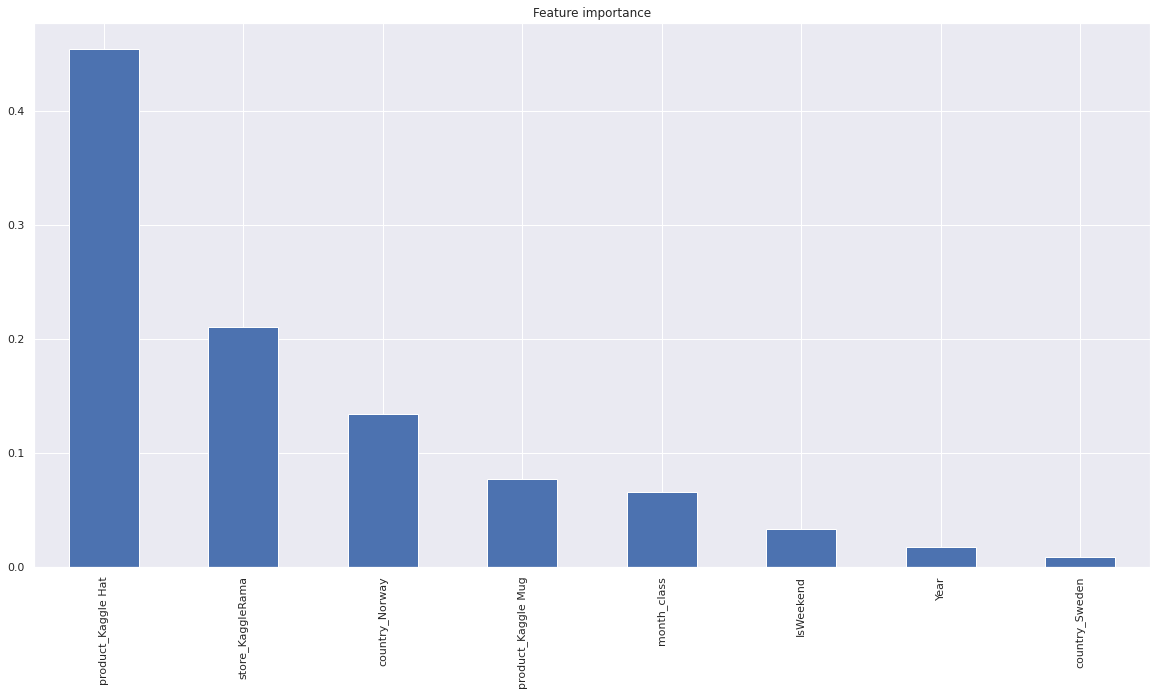

In [50]:
importances = random_forest.feature_importances_
feature_importance = pd.DataFrame(importances, X2.columns, columns=['Feature importance'])
feature_importance.sort_values(by='Feature importance', ascending=False).plot.bar(legend=None, title='Feature importance')

- It seems that features importance values are aligned with what we have seen earlier

In [51]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_fit = xgb_reg.fit(X_train, y_train)
test_xgb_pred = xgb_fit.predict(X_test)
print(f'XGBoost RMSE: {math.sqrt(mean_squared_error(y_test, test_xgb_pred))}')

[15:53:05] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost RMSE: 257.6586580111412


In [52]:
train.head()

,row_id,date,country,store,product,num_sold,Year,Month,Weekday
date,,,,,,,,,
2015-01-01,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,Thursday
2015-01-01,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,Thursday
2015-01-01,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,Thursday
2015-01-01,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,Thursday
2015-01-01,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,Thursday


In [53]:
train.columns

Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold', 'Year',
       'Month', 'Weekday'],
      dtype='object')

In [54]:
avg_sales_2018 = train[train['Year'] == 2018].groupby(['country', 'store', 'product', 'Month', 'Weekday'], as_index=False)['num_sold'].mean()
avg_sales_2018['num_sold_2019'] = avg_sales_2018['num_sold'] + avg_sales_2018['num_sold'] * 0.08 
avg_sales_2018.head()

,country,store,product,Month,Weekday,num_sold,num_sold_2019
0,Finland,KaggleMart,Kaggle Hat,1,Friday,423.25,457.11
1,Finland,KaggleMart,Kaggle Hat,1,Monday,442.4,477.792
2,Finland,KaggleMart,Kaggle Hat,1,Saturday,505.0,545.4
3,Finland,KaggleMart,Kaggle Hat,1,Sunday,494.75,534.33
4,Finland,KaggleMart,Kaggle Hat,1,Thursday,410.25,443.07


In [55]:
test.head()

,row_id,date,country,store,product
date,,,,,
2019-01-01,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
2019-01-01,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2019-01-01,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
2019-01-01,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
2019-01-01,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [56]:
# test['Year'].unique() 
test2 = test.copy()
test2['Year'] = pd.to_datetime(test.index).year
test2['Month'] = pd.to_datetime(test.index).month
test2['Weekday'] = pd.to_datetime(test.index).day_name()
test_pred = test2.merge(avg_sales_2018, 
                       how='inner', 
                       left_on=['country', 'store', 'product', 'Month', 'Weekday'],
                       right_on=['country', 'store', 'product', 'Month', 'Weekday'])
test_pred.head()

,row_id,date,country,store,product,Year,Month,Weekday,num_sold,num_sold_2019
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,2019,1,Tuesday,261.8,282.744
1,26424,2019-01-08,Finland,KaggleMart,Kaggle Mug,2019,1,Tuesday,261.8,282.744
2,26550,2019-01-15,Finland,KaggleMart,Kaggle Mug,2019,1,Tuesday,261.8,282.744
3,26676,2019-01-22,Finland,KaggleMart,Kaggle Mug,2019,1,Tuesday,261.8,282.744
4,26802,2019-01-29,Finland,KaggleMart,Kaggle Mug,2019,1,Tuesday,261.8,282.744


In [57]:
#submission_df = pd.DataFrame({'row_id': test_pred['row_id'],'num_sold': test_pred['num_sold_2019']})
#submission_df.to_csv('avg_predictions.csv', index = False)

Since there are many outliers, I could try to use the median for the predictions

In [58]:
median_sales_2018 = train[train['Year'] == 2018].groupby(['country', 'store', 'product', 'Month', 'Weekday'], as_index=False)['num_sold'].median()
median_sales_2018['num_sold_2019'] = median_sales_2018['num_sold'] + median_sales_2018['num_sold'] * 0.08
median_pred = test2.merge(median_sales_2018, 
                       how='inner', 
                       left_on=['country', 'store', 'product', 'Month', 'Weekday'],
                       right_on=['country', 'store', 'product', 'Month', 'Weekday'])
submission_df = pd.DataFrame({'row_id': median_pred['row_id'],'num_sold': median_pred['num_sold_2019']})
submission_df.to_csv('median_predictions.csv', index = False)

**3. Test preprocessing and predictions**

In [59]:
test.head()

,row_id,date,country,store,product
date,,,,,
2019-01-01,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
2019-01-01,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2019-01-01,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
2019-01-01,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
2019-01-01,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [60]:
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Weekday'] = test.index.day_name()

In [61]:
test.head()

,row_id,date,country,store,product,Year,Month,Weekday
date,,,,,,,,
2019-01-01,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,2019,1,Tuesday
2019-01-01,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,2019,1,Tuesday
2019-01-01,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,2019,1,Tuesday
2019-01-01,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,2019,1,Tuesday
2019-01-01,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,2019,1,Tuesday


In [62]:
test_encoded = pd.concat([test, pd.get_dummies(test[['country', 'store', 'product']])], axis=1).drop(
    columns=['row_id', 'date', 'country', 'store', 'product', 'country_Finland', 'store_KaggleMart', 'product_Kaggle Sticker'])
test_encoded['Weekday'] = test_encoded['Weekday'].map(weekday_dict)
test_encoded.head()

,Year,Month,Weekday,country_Norway,country_Sweden,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug
date,,,,,,,,
2019-01-01,2019,1,2,0,0,0,0,1
2019-01-01,2019,1,2,0,0,0,1,0
2019-01-01,2019,1,2,0,0,0,0,0
2019-01-01,2019,1,2,0,0,1,0,1
2019-01-01,2019,1,2,0,0,1,1,0


In [63]:
test_encoded['IsWeekend'] = test_encoded['Weekday'].map(weekend_dict)
test_encoded['month_class'] = test_encoded['Month'].map(month_dict)
test_encoded.drop(columns=['Month', 'Weekday'], inplace=True)
test_encoded.head()

,Year,country_Norway,country_Sweden,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,IsWeekend,month_class
date,,,,,,,,
2019-01-01,2019,0,0,0,0,1,0,3
2019-01-01,2019,0,0,0,1,0,0,3
2019-01-01,2019,0,0,0,0,0,0,3
2019-01-01,2019,0,0,1,0,1,0,3
2019-01-01,2019,0,0,1,1,0,0,3


Baseline predictions with Random forest regressor:

In [64]:
# preds = random_forest_fit.predict(test_encoded)
# submission_df = pd.DataFrame({'row_id':test['row_id'],'num_sold':preds})
# submission_df.to_csv('submit_rf.csv', index = False)

**Credits to other notebooks in the competition**